# Train Classifier on Handwritten Character Dataset EMNIST
#### IN PROGRESS, TODO: Describe each step

### Find more information about the Extended MNIST (EMNIST) dataset here: 
- https://www.nist.gov/itl/products-and-services/emnist-dataset

## Importing Libraries

In [3]:
from mnist import MNIST # python library which has the EMNIST and MNIST datasets (pip install python-mist)

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from emnist import extract_training_samples
from emnist import list_datasets
from emnist import extract_test_samples
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#### Different Splits of the EMNIST Dataset
#### This Jupyter Notebook uses the "byclass" split by default.

In [4]:
list_datasets()

['balanced', 'byclass', 'bymerge', 'digits', 'letters', 'mnist']

#### Training Data

In [5]:
train_images, train_labels = extract_training_samples('byclass')
print(train_images.shape)
print(train_labels.shape)

(697932, 28, 28)
(697932,)


#### Testing Data

In [6]:
test_images, test_labels = extract_test_samples('byclass')
print(test_images.shape)
print(test_labels.shape)

(116323, 28, 28)
(116323,)


## Extracting the Trainable Dataset and Image Pre-Processing

In [7]:
train_images = tf.keras.utils.normalize(train_images, axis = 1)
test_images = tf.keras.utils.normalize(test_images, axis = 1)

train_images = np.expand_dims(train_images, axis=3)
test_images = np.expand_dims(test_images, axis=3)

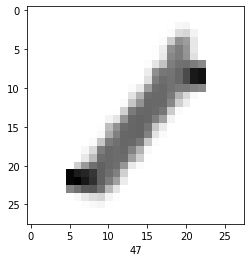

In [8]:
import matplotlib.pyplot as plt
i = 8
plt.imshow(train_images[i],cmap = plt.cm.binary)
plt.xlabel(train_labels[i])
plt.show()

In [9]:
# specify the arguments
rotation_range_val = 15
width_shift_val = 0.10
height_shift_val = 0.10

In [10]:
# create the class object
train_datagen = ImageDataGenerator(rotation_range = rotation_range_val,
                             width_shift_range = width_shift_val,
                             height_shift_range = height_shift_val)

In [11]:
# fit the generator
train_datagen.fit(train_images.reshape(train_images.shape[0], 28, 28, 1))

In [12]:
# define number of rows & columns
num_row = 4
num_col = 8
num= num_row*num_col

## Data Augmentation

BEFORE:



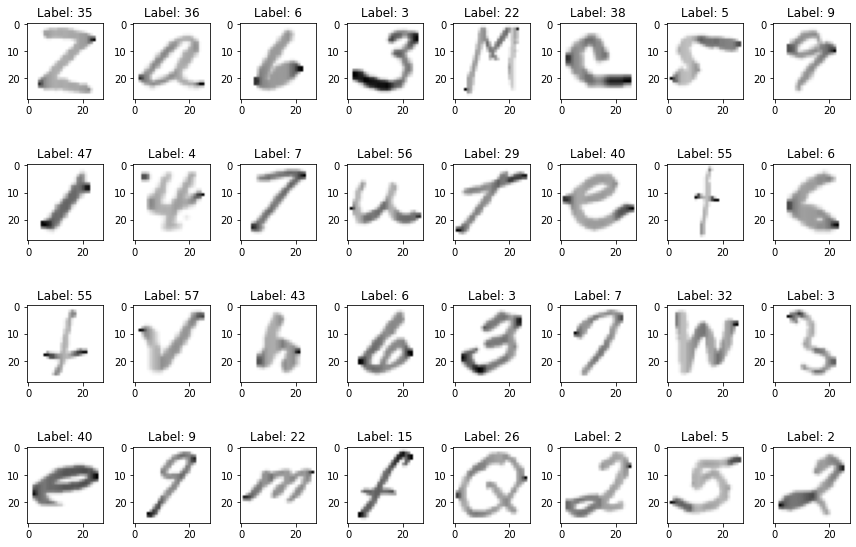

In [14]:
# plot before
print('BEFORE:\n')
# plot images
fig1, axes1 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
     ax = axes1[i//num_col, i%num_col]
     ax.imshow(train_images[i], cmap='gray_r')
     ax.set_title('Label: {}'.format(train_labels[i]))
plt.tight_layout()
plt.show()

AFTER:



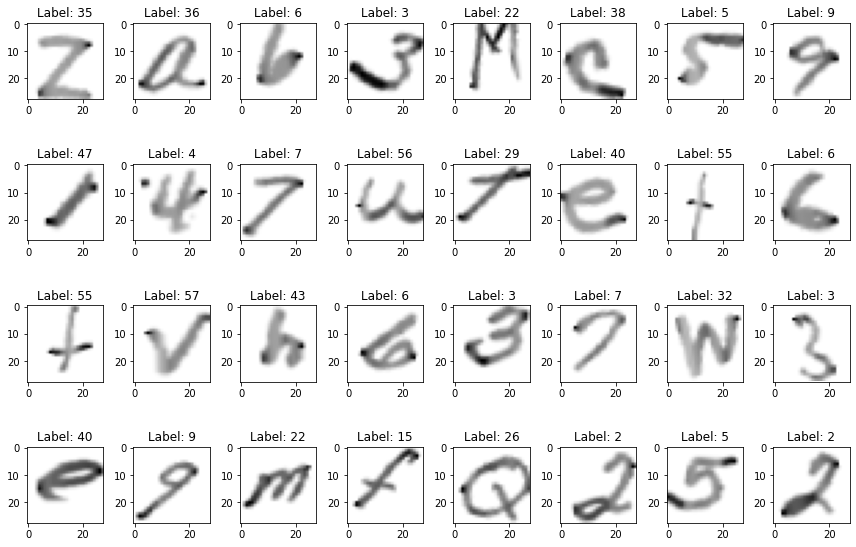

In [15]:
# plot after
print('AFTER:\n')
fig2, axes2 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for X, Y in train_datagen.flow(train_images.reshape(train_images.shape[0], 28, 28, 1),train_labels.reshape(train_labels.shape[0], 1),batch_size=num,shuffle=False):
     for i in range(0, num):
          ax = axes2[i//num_col, i%num_col]
          ax.imshow(X[i].reshape(28,28), cmap='gray_r')
          ax.set_title('Label: {}'.format(int(Y[i])))
     break
plt.tight_layout()
plt.show()

In [16]:
val_datagen = ImageDataGenerator()
val_datagen.fit(test_images.reshape(test_images.shape[0], 28, 28, 1))
val_datagen

## Creating the Model

In [83]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1), padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(47, activation = 'softmax')
])

In [84]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 2, 2, 128)       

In [85]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [86]:
history = model.fit(train_datagen.flow(train_images, train_labels, batch_size=1024),
         validation_data= val_datagen.flow(test_images, test_labels,
         batch_size=32), epochs= 20)

Epoch 1/20
111/111 [==============================] - 45s 397ms/step - loss: 2.2384 - accuracy: 0.3845 - val_loss: 0.8443 - val_accuracy: 0.7397
Epoch 2/20
111/111 [==============================] - 44s 395ms/step - loss: 0.9936 - accuracy: 0.6920 - val_loss: 0.5701 - val_accuracy: 0.8159
Epoch 3/20
111/111 [==============================] - 47s 419ms/step - loss: 0.7569 - accuracy: 0.7564 - val_loss: 0.4951 - val_accuracy: 0.8328
Epoch 4/20
111/111 [==============================] - 44s 397ms/step - loss: 0.6585 - accuracy: 0.7835 - val_loss: 0.4582 - val_accuracy: 0.8463
Epoch 5/20
111/111 [==============================] - 47s 419ms/step - loss: 0.5958 - accuracy: 0.8007 - val_loss: 0.4274 - val_accuracy: 0.8556
Epoch 6/20
111/111 [==============================] - 45s 408ms/step - loss: 0.5534 - accuracy: 0.8114 - val_loss: 0.4051 - val_accuracy: 0.8614
Epoch 7/20
111/111 [==============================] - 45s 407ms/step - loss: 0.5223 - accuracy: 0.8210 - val_loss: 0.4016 - val_ac

In [87]:
scores = model.evaluate(test_images,test_labels)

588/588 [==============================] - 2s 4ms/step - loss: 0.3262 - accuracy: 0.8836


In [88]:
print("Accuracy: %.2f%%"%(scores[1]*100))

Accuracy: 88.36%


## Creating the Model History Graphs

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


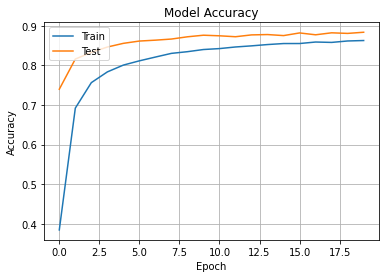

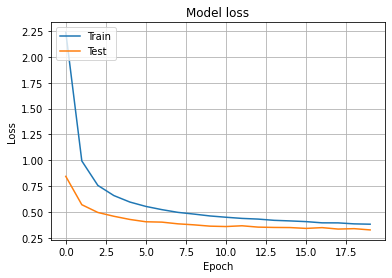

In [89]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid()
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid()
plt.show()

## Saving the Model

In [90]:
model.save("/Users/karabressler/Jupyter Notebooks/emnist-byclass-saved-model")

INFO:tensorflow:Assets written to: /Users/karabressler/Jupyter Notebooks/emnist-balanced-saved-model/assets
